<a href="https://colab.research.google.com/github/adilsong3/DataScience_Junior/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analisando a Violência no Rio de Janeiro

![alt text](https://i.imgur.com/g9goSR2.png)

Todos nós sabemos que o Rio de Janeiro é conhecido por todos como a cidade maravilhosa e possui grandes admiradores no mundo todo por conta de sua beleza e pontos turísticos como por exemplo a estátua do **Cristo Redentor** eleito informalmente como uma das 7 maravilhas do mundo e mede 38 metros de altura e fica localizado no topo do Corcovado.

O Rio de Janeiro atualmente está com uma população que passa da casa dos 6,5 milhões. E em meio a essa pandemia do Covid-19 que estamos passando no ano de 2020, no dia 21/06/2020 os dados eram que o numero de casos confirmados já passam de 95 mil e o número de mortos já passam dos 9 mil conforme consta a **notícia do g1**, [clique aqui para conferir a reportagem completa](https://g1.globo.com/rj/rio-de-janeiro/noticia/2020/06/20/casos-de-covid-19-no-rj-em-20-de-junho.ghtml).

Sabemos que a quantidade de pessoas que não gostam ou não visitariam o Rio de Janeiro por causa do seu alto indice de violência é assustadora, mas se eu te falar que a cada ano que passa a taxa de homicídios tem diminuido, você acreditaria?

Está duvidando? Então me acompanhe nesse notebook para que possamos juntos explorar a base de dados do [Governo do Rio de Janeiro](http://www.ispdados.rj.gov.br/estatistica.html).

## **O que verá nesta análise:**

* Exploração dos dados.
* Entendendo os dados.
  * Verificando se possuem dados nulos ou ausentes.
  * O que fazer com esses dados nulos.
* Trazer informações estátisticas.
* Visualização de dados em formas de tabelas e também com gráficos como:
  * Homicídio doloso.
  * Homicídio culposo.
  * Roubos de veículos.
  * Furtos de veículos.
* Conclusões de cada gráfico.
* Conclusão final.

![alt text](https://i.imgur.com/WLvXufj.png)

## **Obtenção dos Dados**

* Esse [dataset](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv) que usaremos é a partir dos anos 90, porém para essa análise vamos levar em consideração os anos 2000 até a presente data. E após essa análise você mesmo pode tirar suas conclusões.

### **Importando os dados**

* Primeiro vamos importar a biblioteca pandas e depois vamos ler o nosso dataset que usaremos nas análises, passaremos no formato csv exemplo: `df = pd.read_csv("endereço_dos_seus_dados.csv")``

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Análise Inicial dos Dados**

Primeiramente vamos começar com o básico, conhecer nosso dataset para que possamos ter uma visão geral de tudo e depois sim, partimos para o que realmente queremos ver.

Para essa análise inicial iremos seguir as seguintes etapas:

* Qual o tamanho do nosso DataFrame?
* Vamos verificar os nomes das colunas;
* Temos valores nulos (sem preencher)?
* Vamos também visualizar as 5 primeiras linhas;
* Identifique a porcentagem de valores ausentes das colunas


In [2]:
# Qual o tamanho do nosso Dataframe? para isso vamos utilizar o (.shape)
print(f"Total de linhas do Dataframe: {df.shape[0]}")
print(f"Total de colunas do Dataframe: {df.shape[1]}")

Total de linhas do Dataframe: 344
Total de colunas do Dataframe: 56


In [3]:
# Quais os nomes das colunas? para isso vamos utilizar o (.columns)
# Como são muitas colunas vamos mostrar os nomes apenas de 5
df.columns[:5]

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio'], dtype='object')

In [4]:
# Vamos verificar se tem valores nulos e quais os tipos das colunas.
# vamos utilizar função isnull, depois .sum() para somar os nulos por categoria;
# .sort_values(ascending=False) para colocar em ordem decrescente;
# Para descobrir a porcentagem dividirmos pelo total de linhas;
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

In [5]:
# Verificando a partir de qual ano e em quais colunas possuem dados nulos
df.set_index('vano').isna().sum(level=0)

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1992,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1993,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1994,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1995,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1996,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1997,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1998,0.0,0.0,12.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0


Após verificar na tabela acima que temos muitos dados que não foram preenchidos desde o começo desse projeto do governo do rio. Com isso em mente podemos começar a questionar algumas coisas.

* **Por que tem muitos dados Nulos?**
  * Talvez porque no começo desse projeto não tinha tantas perguntas e as pessoas começaram a preencher depois.
* **Por que algumas linhas tem valor zero? Será que realmente no mês todo não houve nenhum caso de roubo de bicicleta por exemplo?**
  * Pode ser que os crimes eram colocados tudo como o mesmo e depois decidiram separar.

A análise de dados não é apenas código e sim uma contextualização envolvendo todas as vertentes. Nunca devemos nos basear apenas no que diz um dataset, e sim na história. Se faça no mínimo essas duas perguntas:

* **De onde peguei esses dados?**
* **Essa base é confiavel?**

Sempre questione a base de dados que está trabalhando e considere em cima desses questionamentos visando os insights que podem surgir ao longo da análise.

****

Vamos começar fazendo algumas mudanças no dataset.

* Primeiro começar juntando o ano e o mês em uma coluna única, 
* Depois transformar em formato **`datetime`** para que possamos trabalhar de uma forma melhor.
* Criar uma cópia do dataframe para trabalhar com uma segurança maior.
* Voltar o dataframe com o index padrão.
* Excluir as colunas **`vano e mes`**.
* Colocar o index com a nova coluna data
* Criar um novo dataset com os dados a partir dos anos 2000


In [6]:
# Criando uma coluna data com ano e mes
df['data'] = df.vano.astype('str') + "-" + df.mes.astype('str')

# Alterando o formato da coluna
df['data'] = pd.to_datetime(df.data)

In [7]:
# Voltar para o dataframe com o index padrão
df.reindex()

# Criar uma cópia do dataframe
df_copy = df

# Excluir as colunas vano e mes
df_copy.drop(columns=['vano','mes'], inplace=True)

# Colocar como index a nova coluna data
df_copy.set_index('data')

# Criando um novo dataset com os dados a partir dos anos 2000
df_2000 =  df_copy.query('index >= 108')

### **Informações Estátisticas**
![alt text](https://i.imgur.com/Soe3L7W.png)

* Com nosso dataset mais alinhado e limpo, iremos ver alguns dados estátisticos da violência no Rio de Janeiro.
* Vamos utilizar o .describe() essa função nos retornar `min, max, desvio padrão, média, mediana`.
* Iremos encontrar as médias das seguintes variáveis (colunas):
  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`
* Vamos calcular qual a porcentagem de carros recuperados em relação aos carros roubados + carros furtados:
  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

In [8]:
# Fazendo um resumo estátistico
df_2000.describe()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,200.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,200.000000,236.000000,200.000000,200.000000,68.000000,236.000000,236.000000,236.000000,236.000000,200.000000,200.000000,68.000000,236.000000,236.000000,236.000000,200.000000,200.000000,200.000000,236.000000,164.000000,164.000000,164.000000,236.000000,164.000000,164.000000,164.000000,164.000000,236.000000,212.000000,236.000000,212.000000,200.000000,200.00000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,457.847458,4.110169,15.470339,76.483051,383.851695,6342.855932,369.945000,199.449153,3420.754237,494.940678,124.953390,2696.330508,424.521186,4542.283898,748.250000,4.080508,3.550000,957.974576,11.320000,145.665000,10.808824,1542.292373,11674.788136,1549.326271,1906.165254,650.230000,1449.175000,124.808824,7160.500000,12431.110169,0.699153,133.265000,7.755000,2231.860000,1365.881356,609.237805,759.146341,186.146341,2091.059322,2319.585366,568.628049,1255.512195,83.042683,5649.080508,435.132075,62.262712,3.301887,2.085000,0.34000,553.911017,6248.508475,2696.330508,54847.936441,2.991525
std,88.401225,2.422532,5.541638,35.091790,97.783865,866.303772,94.392434,36.092575,792.873808,106.370352,25.728739,803.812342,219.197287,2185.439382,314.756564,4.318919,2.634808,624.309034,6.404113,55.392367,7.767628,663.562310,3756.906040,202.198321,937.434068,268.836273,368.638776,80.247427,1046.850139,2636.742061,0.971158,43.303821,5.089646,772.093064,524.506011,246.307700,312.871487,36.221243,525.703489,650.520866,248.040620,357.035450,62.951374,989.127054,65.353516,32.448435,2.192922,1.761616,0.63752,103.351314,2762.927900,803.812342,10245.738491,0.091861
min,272.000000,0.000000,5.000000,15.000000,186.000000,2521.000000,188.000000,111.000000,848.000000,277.000000,49.000000,1413.000000,170.000000,1049.000000,303.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,782.000000,6283.000000,1159.000000,519.000000,23.000000,484.000000,0.000000,3089.000000,5795.000000,0.000000,23.000000,0.000000,717.000000,688.000000,248.000000,262.000000,114.000000,1188.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,16.000000,0.000000,0.000000,0.00000,334.000000,1911.000000,1413.000000,31231.000000,2.000000
25%,381.750000,2.000000,11.000000,48.750000,315.750000,5709.500000,282.000000,174.750000,3030.250000,408.750000,105.000000,2225.500000,273.750000,2277.750000,520.000000,1.000000,2.000000,549.750000,6.000000,106.000000,2.250000,1021.750000,9135.750000,1381.750000,967.000000,501.000000,1297.000000,3.750000,6521.000000,10328.250000,0.000000,109.750000,4.750000,1654.500000,928.750000,360.500000,426.000000,160.000000,1735.750000,1681.000000,332.500000,950.500000,46.000000,4977.000000,390.000000,39.000000,2.000000,1.000000,0.00000,477.000000,3492.250000,2225.500000,46532.750000,3.000000
50%,462.500000,4.000000,15.000000,74.000000,362.500000,6324.500000,384.000000,196.000000,3394.000000,470.500000,124.000000,2555.500000,346.000000,4800.500000,693.000000,3.000000,3.000000,717.500000,10.000000,149.500000,13.000000,1275.500000,10413.500000,152

In [9]:
# Média da coluna roubo de veículos.
# Utilizaremos o round para arredondar a média com 4 casas decimais.
round(df_2000.roubo_veiculo.mean(), 4)

2696.3305

In [10]:
# Média da coluna furto de veículos.
round(df_2000.furto_veiculos.mean(), 4)

1549.3263

In [11]:
# Média da coluna recuperação de veículos.
round(df_2000.recuperacao_veiculos.mean(), 4)

2091.0593

In [12]:
# Vamos calcular qual a porcentagem de carros recuperados em relação 
# aos carros roubados + carros furtados:
recuperados = df_2000.recuperacao_veiculos.sum()
carros_r_f = df_2000.roubo_veiculo.sum() + df_2000.furto_veiculos.sum()
porcentagem = (recuperados / carros_r_f) * 100

# Mostrando na tela os dados
print(f"Os dados abaixo são do ano de 2000 a 2019!\n")
print(f"Total de veículos furtados + roubados: {carros_r_f}")
print(f"Total de veículos recuperados: {recuperados}")
print(f"Porcentagem dos veículos recuperados: {round(porcentagem, 2)}%")

Os dados abaixo são do ano de 2000 a 2019!

Total de veículos furtados + roubados: 1001975
Total de veículos recuperados: 493490
Porcentagem dos veículos recuperados: 49.25%


## **Visualização dos dados**

![alt text](https://posgraduando.com/wp-content/uploads/2016/01/estatistica-13.jpg)

Agora que temos nosso novo dataset com os dados a partir dos anos 2000, podemos partir para algumas análises e gráficos com as colunas que possuem todos os dados limpos e conforme precisarmos de uma limpeza em algumas colunas faremos.

* Vamos começar com a coluna homicídio doloso utilizando a coluna `hom_doloso`;
* Depois vamos para homicídio culposo utilizando a coluna `hom_culposo`;
  * Vamos fazer uma pequena análise nos dois itens acima.

### **Gráfico de Homicídio Doloso**

Para fazer esse gráfico precisamos passar por algumas etapas como:
* Criar uma **`series`** com os anos que utilizaremos para criar o gráfico.
* Definir o tamanho do gráfico e seu tipo.
* Escolher um título adequado.


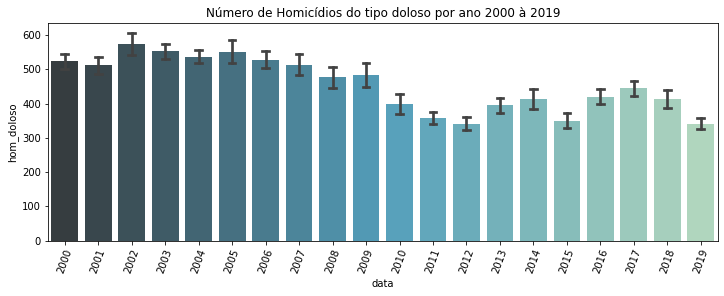

In [13]:
# Criando uma series com apenas os anos
anos = df_2000.data.dt.year

# definindo o tamanho do nosso gráfico
plt.figure(figsize=(12, 4))

# Criando nosso gráfico com a biblioteca seaborn
sns.barplot(x=anos, y='hom_doloso', data=df_2000, palette=("GnBu_d"), capsize=.2)

# Definindo um título para nosso gráfico
plt.title('Número de Homicídios do tipo doloso por ano 2000 à 2019',)

# Definindo a rotação da coluna X para 70 graus
plt.xticks(rotation=70)
plt.show()

#### **Conclusão sobre Homicídio Doloso**

* Verificamos acima com apenas algumas linhas de código que a taxa de homicídios doloso tem vindo em um tendência de queda, significa que o governo do Rio de Janeiro está no caminho certo?

* Não podemos de maneira nenhuma afirmar isso e apenas colocar esse gráfico em uma apresentação e falar o Governo do Rio de Janeiro está de parabéns pois a taxa de homicídios por 
ano tem diminuído desde os anos 2000 e está com uma tendência de baixa. 

* Precisamos verificar se isso é realmente verdade ou somente as pessoas deixaram de alimentar essa base de dados, ou estão com mais medo ao longo do tempo de denunciar os crimes cometidos contra ela, seja por ameaças ou apenas por medo.

### **Gráfico de Homicídio Culposo**

* Aqui iremos utilizar a mesma base de código anterior, nesse dataset só será possivel fazer isso pois essa coluna está com todos os dados preenchidos.

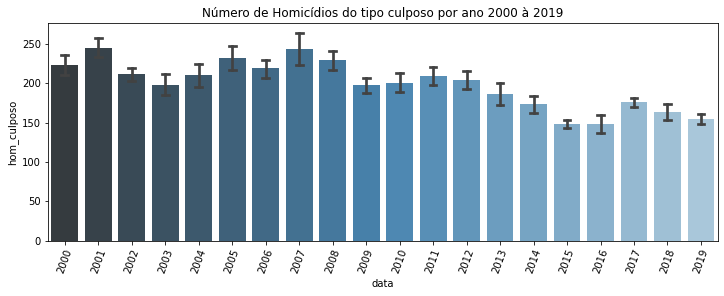

In [14]:
# definindo o tamanho do nosso gráfico
plt.figure(figsize=(12, 4))

# Criando nosso gráfico com a biblioteca seaborn
sns.barplot(x=anos, y='hom_culposo', data=df_2000, palette="Blues_d", capsize=.2)

# Definindo um título para nosso gráfico
plt.title('Número de Homicídios do tipo culposo por ano 2000 à 2019',)

# Definindo a rotação da coluna X para 70 graus
plt.xticks(rotation=70)
plt.show()

#### **Conclusão sobre Homicídio Culposo**

* Verificamos que da mesma forma que os homicídios doloso nesse dataset estão com tendência de baixa, os homicídios culposo também estão.
* Temos um padrão, como disse anteriormente não podemos afirmar nada, apenas que nesse dataset com os dados que nos foram disponibilizados parece que estamos ao longo do tempo tendo uma melhora.


### **Gráficos de roubos e furtos de celulares**

Vamos agora entrar um pouco nos dados envolvendo roubos e furtos de celulares.

* Iremos começar primeiro com os itens visados por quase todo ladrão a todo momento, os celulares.
  * Roubos de celulares.
  * Furto de celulares.

#### **Roubo de celulares**

Para esse gráfico será necessário:
* Definir o gráfico a ser utilizado.
* Definir o Tamanho do gráfico.
* Definir um título de fácil compreensão.
* Por fim uma breve conclusão do gráfico.

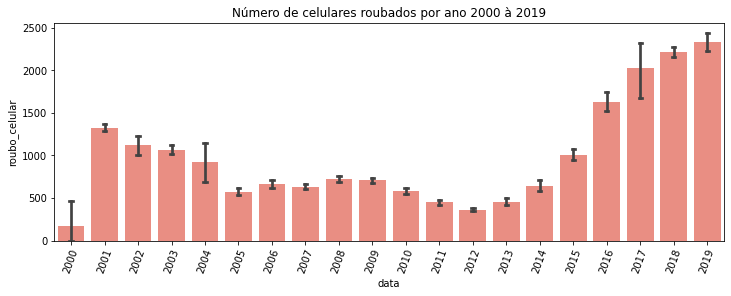

In [15]:
# definindo o tamanho do nosso gráfico
plt.figure(figsize=(12, 4))

# Criando nosso gráfico com a biblioteca seaborn
sns.barplot(x=anos, y='roubo_celular', data=df_2000, color="salmon", capsize=.1)

# Definindo um título para nosso gráfico
plt.title('Número de celulares roubados por ano 2000 à 2019')

# Definindo a rotação da coluna X para 70 graus
plt.xticks(rotation=70)
plt.show()

In [16]:
# Cálculo do total de celulares roubados
print(f"Total de celulares roubados em 19 anos: {df_2000.roubo_celular.sum()}")

# Cálculo da mediana de celulares roubados
print(f"Mediana de celulares roubados: {df_2000.roubo_celular.median()}")

Total de celulares roubados em 19 anos: 226082.0
Mediana de celulares roubados: 717.5


#### **Conclusão sobre roubo de celulares**

* Vemos que diferente do grupo de homicídios que parece estar em uma tendência de baixa, os roubos de celular tem crescido nos últimos 7 anos.
* O total de roubos de celulares em 19 anos no Rio de Janeiro foi de **226.082** mil.
* A mediana está em torno de **717**.

#### **Furto de celulares**

Para esse gráfico vamos precisar fazer algumas coisas diferentes do que foi feito para o de roubo de celulares, como:

* Verificamos na análise inicial dos dados, os dados de furtos de celulares começaram a partir do ano de 2003, então para uma análise mais clara dos dados, utilizaremos apenas os anos de 2003 em diante.
  * Começaremos criando um novo Dataframe
  * Criar uma series com os anos que desejamos transformar em gráfico.
* Vamos definir o gráfico a ser utilizado.
* Definir um título de fácil compreensão.
* Por fim uma breve conclusão do gráfico.

In [17]:
# Puxando apenas os dados de 2003 em diante
df_2003 = df_2000.query('index >= 144')

# Criando uma series com os anos de 2003 em diante
anos_2003 = df_2003.data.dt.year

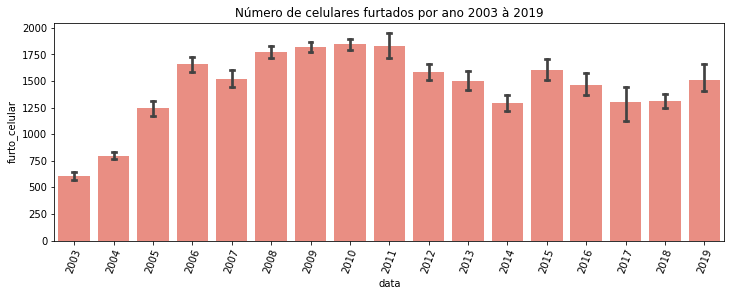

In [18]:
# definindo o tamanho do nosso gráfico
plt.figure(figsize=(12, 4))

# Criando nosso gráfico com a biblioteca seaborn
sns.barplot(x=anos_2003, y='furto_celular', data=df_2003, color="salmon", capsize=.1)

# Definindo um título para nosso gráfico
plt.title('Número de celulares furtados por ano 2003 à 2019')

# Definindo a rotação da coluna X para 70 graus
plt.xticks(rotation=70)
plt.show()

In [19]:
# Cálculo do total de celulares furtados
print(f"Total de celulares furtados em 16 anos: {df_2003.furto_celular.sum()}")

# Cálculo da mediana de celulares furtados
print(f"Mediana de celulares furtados: {df_2003.furto_celular.median()}")

Total de celulares furtados em 16 anos: 289835.0
Mediana de celulares furtados: 1492.5


#### **Conclusão sobre furtos de celulares**

* Olhando o gráfico de celulares furtados vemos uma leve alta nos ultimos 2 anos, porém ao longo de 16 anos vemos um gráfico totalmente instável e com uma leve tendência de alta.
* O total de furtos de celulares em 16 anos no Rio de Janeiro foi de **289.835** mil.
* A mediana por ano de casos de furtos de celulares está em torno de **1.492** mil.

## **Conclusão final**

Chegamos ao final de mais uma análise, vimos nesse dataset algumas informações referente a diminuição de homicídios ao longo dos anos e o aumento do furto e roubo de celulares. 

Porém reforço mais um vez que nenhuma análise pode ser apresentada como certeza absoluta, pois não sabemos se todos os casos foram preenchidos da forma correta, quem preencheu os dados? Os dados são legítimos ou não?

Devemos ser cautelosos e fazer análises para apresentar as circuntâncias com base não só em dados, mas com o contexto, notícias, ir realmente a fundo.

Vale ressaltar que esse dataset trás muitas outras informações que são muito relevantes e que não foram faladas nesse notebook, como:

* Casos de latrocínio.
* Homicídio por intervenção policial.
* Total de casos de estelionato.
* Roubos de todos os gêneros como:
  * Comércio.
  * Carga.
  * Banco.
  * Muitos outros...
* Casos envolvendo pessoas desaparecidas.
* Casos onde foi encontrado o corpo.

Isso são casos para uma outra análise mais aprofundada, caso esteja interessado em pegar os conhecimentos aprendidos nesse notebook e testar nos casos apresentados acima, fique a vontade segue abaixo os links e faça sua própria análise.

* **O arquivo csv se encontra no endereço abaixo:**

  * [Arquivo utilizado para a análise](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv)


* **Este é o site oficial, do Governo do Estado do Rio de Janeiro:**

  * http://www.ispdados.rj.gov.br/estatistica.html

* **Um dashboard interativo e visual pode ser encontrado no site abaixo:**

  * http://www.ispvisualizacao.rj.gov.br/index.html

#### **Como me encontrar**

* Linkedin: [Adilson Gustavo](https://www.linkedin.com/in/adilson-gustavo-a74b98133/)
* Github: [Adilson Gustavo](https://github.com/adilsong3/DataScience_Junior/blob/master/README.md)